<center><img src=https://github.com/nccr-itmo/FEDOT/raw/master/docs/fedot_logo.png></img></center>

# <center>Case of multimodal data classification using the [FEDOT](https://github.com/nccr-itmo/FEDOT) framework</center>

# Introduction

**FEDOT** is an open source automatic machine learning framework that is capable of automating the creation and optimization of machine learning pipelines and their elements.
The framework allows you to compactly and efficiently solve various modeling problems.

**Multimodal data** is data that has a different nature (tables, text, images, time series). Humans perceive the world in [a multimodal way](https://en.wikipedia.org/wiki/McGurk_effect), so using this approach in machine learning can also work. Indeed, the sharing of several types of data improves the quality of the model at the expense of information that may be contained in one modality and absent in another.

### FEDOT installation

Let's install FEDOT of version 0.7.5

In [25]:
!pip install fedot==0.7.5

<div class="alert alert-block alert-info"><b>Note</b>: there are alternative ways to install the framework and its dependencies, which can be found in the section <b><a href="https://fedot.readthedocs.io/en/latest/introduction/tutorial/quickstart.html">Quickstart</a></b> in our documentation</div>

## Data loading

As an example, let's take the prepared data from the [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews) dataset (winemag-data_first150k). For convenience and speed of work, the number of lines and classes has been reduced, no other preprocessing has been carried out (we will leave this to Fedot).

The **description** field contains a textual description of the different varieties of wine, and the target variable is the **variety** field.

In [24]:
import pandas as pd
path = '../data/multimodal_wine.csv'

df = pd.read_csv(path)
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
2,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
3,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
4,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...,...,...,...,...
774,US,"This is a rich, broad-shouldered Pinot Noir, w...",Brown Ranch,88,72.0,California,Carneros,Napa-Sonoma,Pinot Noir,Saintsbury
775,US,"A delicate, almost fragile wine, this opens wi...",Arbre Vert Vineyard,88,42.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Siduri
776,US,"Even with some hours of breathing time, this r...",La Colina Vineyard,88,60.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Torii Mor
777,US,"Loaded with scents and flavors of chocolate, m...",Shea Vineyard,88,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Walt


Data has been loaded. Now you can try several solutions.

## Using FEDOT's multimodal functionality

You can solve this classification problem using FEDOT with a few lines of code. First, we import the necessary modules and classes, and also split the selection into train and test parts.

FEDOT will automatically detect the **description** field as a text field and apply various text processing models to it. You should also point out the column with the target variable **variety** and the absence of a separate index column in the data.

In [25]:
from fedot.api.main import Fedot
from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

data = MultiModalData.from_csv(file_path=path, task='classification', target_columns='variety', index_col=None)
fit_data, predict_data = train_test_data_setup(data, shuffle_flag=True, split_ratio=0.7)

Let's set the parameters of the AutoML model.

In [46]:
automl_model = Fedot(problem='classification', metric=['roc_auc', 'f1'], timeout=60, seed=42, keep_history=True)

* `problem = 'classification'` - problem solved by the framework
* `timeout = 60` - framework time in minutes
* `seed = 42` - let's fix the seed for reproducibility

<div class="alert alert-block alert-info"><b>Note</b>: there are also other options for running FEDOT. More details can be found in the section <b><a href="https://fedot.readthedocs.io/en/latest/api/api.html">FEDOT API</a></b> in our documentation.</div>

Next, you can start the process of finding the optimal pipeline and its training. It is necessary to pass data for training to the `.fit()` method.

In [47]:
automl_model.fit(features=fit_data,
                 target=fit_data.target)

2025-09-09 19:43:57,486 - ApiComposer - Initial pipeline was fitted in 37.6 sec.
2025-09-09 19:43:57,490 - ApiComposer - Taking into account n_folds=5, estimated fit time for initial assumption is 188.1 sec.
2025-09-09 19:43:57,494 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2025-09-09 19:43:57,519 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 60 min. Set of candidate models: ['bernb', 'catboost', 'dt', 'fast_ica', 'isolation_forest_class', 'knn', 'lgbm', 'logit', 'mlp', 'normalization', 'pca', 'poly_features', 'qda', 'resample', 'rf', 'scaling', 'xgboost'].
2025-09-09 19:43:58,417 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 0/10000 [00:00<?, ?gen/s]

2025-09-09 19:45:53,657 - MultiprocessingDispatcher - 6 individuals out of 6 in previous population were evaluated successfully.
2025-09-09 19:52:09,952 - MultiprocessingDispatcher - 19 individuals out of 21 in previous population were evaluated successfully.
2025-09-09 19:54:32,826 - MultiprocessingDispatcher - 12 individuals out of 13 in previous population were evaluated successfully.
2025-09-09 19:55:54,465 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.
2025-09-09 19:58:22,121 - MultiprocessingDispatcher - 4 individuals out of 4 in previous population were evaluated successfully.


Generations:   0%|          | 1/10000 [14:23<2398:57:02, 863.71s/gen]

2025-09-09 20:00:11,207 - MultiprocessingDispatcher - 18 individuals out of 18 in previous population were evaluated successfully.
2025-09-09 20:03:08,484 - MultiprocessingDispatcher - 16 individuals out of 16 in previous population were evaluated successfully.


Generations:   0%|          | 2/10000 [19:10<1455:32:24, 524.10s/gen]

2025-09-09 20:03:08,807 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 2/10000 [19:10<1597:25:36, 575.19s/gen]

2025-09-09 20:03:08,878 - ApiComposer - Hyperparameters tuning started with 40 min. timeout


2025-09-09 20:10:17,028 - SimultaneousTuner - Initial graph: {'depth': 6, 'length': 14, 'nodes': [rf, logit, catboost, scaling, tfidf, data_source_text/description, xgboost, lgbm, logit, catboost, scaling, data_source_table, xgboost, lgbm]}
rf - {'n_jobs': 1}
logit - {}
catboost - {'n_jobs': 1, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
tfidf - {'min_df': 0.035041258149844275, 'max_df': 0.9647095788749873, 'ngram_range': (1, 3)}
data_source_text/description - {}
xgboost - {'n_jobs': 1, 'verbosity': 0, 'booster': 'dart', 'tree_method': 'auto', 'enable

{'depth': 6, 'length': 14, 'nodes': [rf, logit, catboost, scaling, tfidf, data_source_text/description, xgboost, lgbm, logit, catboost, scaling, data_source_table, xgboost, lgbm]}

Pipeline's structure in text form is shown above. For visualization, we will use the `.show()` method.

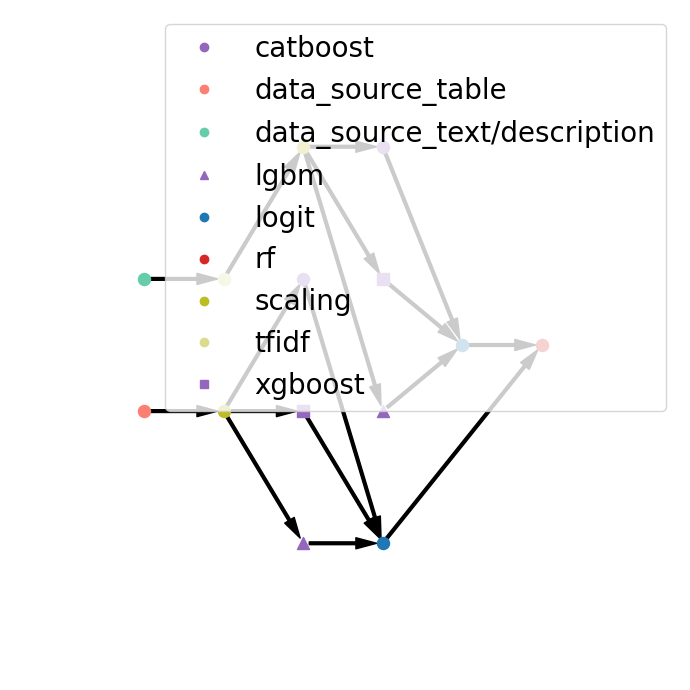

In [48]:
automl_model.current_pipeline.show(node_size_scale=0.5, dpi=100)

Let's predict the target variable and compare the metrics.

In [49]:
prediction = automl_model.predict(predict_data)

metrics = automl_model.get_metrics()

metrics

{'roc_auc': 0.5, 'f1': 0.795}

Let's visualize the metric.

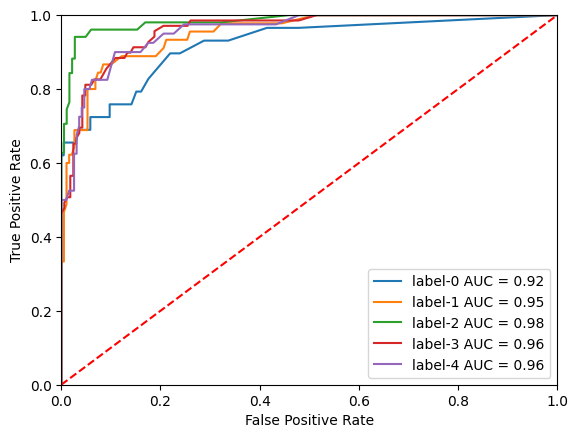

In [50]:
automl_model.plot_prediction()

Let's save the history of the generation process in JSON format.

In [52]:
automl_model.history.save('multimodal_history.json');

Using the history, you can look at the change in the value of the metrics for each stage of generation. FEDOT uses evolutionary algorithms and compares the metrics of several individual pipelines in each generation, so the best visualization method is a boxplot, where the middle line means the median value of the metric in a generation.

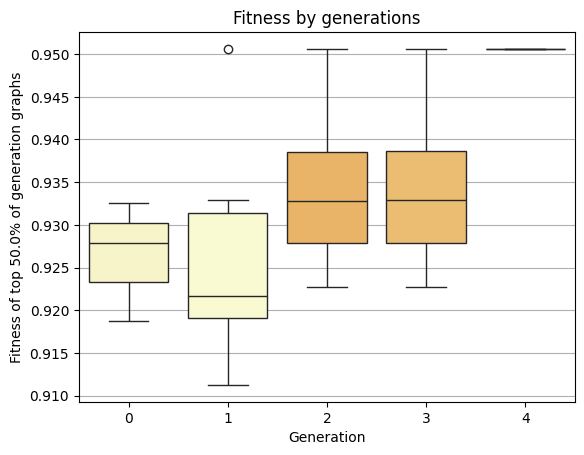

In [53]:
automl_model.history.show.fitness_box(best_fraction=0.5, dpi=100)

You can also look at which specific models dominated the pipelines during the generation process.

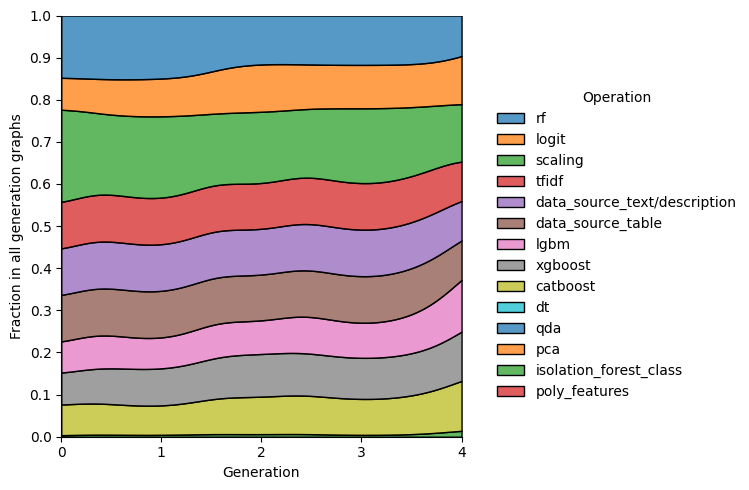

In [54]:
automl_model.history.show.operations_kde(dpi=100)

### Baseline

To compare the quality of the model, we will run FEDOT on the same data, but training only the standard initial pipeline.

In [55]:
baseline_model = Fedot(problem='classification', metric=['roc_auc', 'f1'], seed=42)
baseline_model.fit(features=fit_data,
                 target=fit_data.target,
                 predefined_model='auto')

2025-09-09 21:08:14,571 - FEDOT logger - Final pipeline: {'depth': 6, 'length': 14, 'nodes': [rf, logit, catboost, scaling, tfidf, data_source_text/description, xgboost, lgbm, logit, catboost, scaling, data_source_table, xgboost, lgbm]}
rf - {'n_jobs': 1}
logit - {}
catboost - {'n_jobs': 1, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
tfidf - {'min_df': 0.1, 'max_df': 0.9}
data_source_text/description - {}
xgboost - {'n_jobs': 1, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stoppin

{'depth': 6, 'length': 14, 'nodes': [rf, logit, catboost, scaling, tfidf, data_source_text/description, xgboost, lgbm, logit, catboost, scaling, data_source_table, xgboost, lgbm]}

The `timeout` parameter is not used in this case, so we will remove it. The `predefined_model` parameter specifies that we will not run AutoML, but will simply train the model on the standard initial pipeline.

Let's visualize the pipeline.

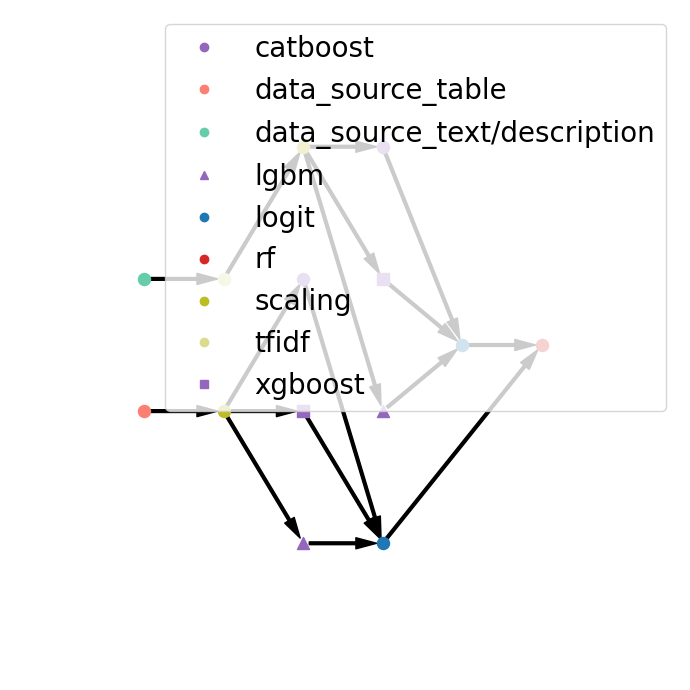

In [56]:
baseline_model.current_pipeline.show(node_size_scale=0.5, dpi=100)

Let's get and compare the metrics. It is noticeable that even a small training time significantly improves the quality metrics.

In [57]:
prediction = baseline_model.predict(predict_data)

baseline_metrics = baseline_model.get_metrics()

baseline_metrics

{'roc_auc': 0.5, 'f1': 0.717}

### Tabular data only

To verify the significance of both modalities, let's train the base model only on tabular data. To do this, simply exclude the **description** text field when loading the data.

In [58]:
table_data = MultiModalData.from_csv(file_path=path, task='classification', target_columns='variety', 
                                     columns_to_drop=['description'], index_col=None)
table_fit_data, table_predict_data = train_test_data_setup(table_data, shuffle_flag=True, split_ratio=0.7)

In [59]:
table_model = Fedot(problem='classification', metric=['roc_auc', 'f1'], seed=42)
table_model.fit(features=table_fit_data,
                 target=table_fit_data.target,
                 predefined_model='auto')

2025-09-09 22:59:17,653 - FEDOT logger - Final pipeline: {'depth': 5, 'length': 7, 'nodes': [rf, logit, catboost, scaling, data_source_table, xgboost, lgbm]}
rf - {'n_jobs': 1}
logit - {}
catboost - {'n_jobs': 1, 'num_trees': 3000, 'learning_rate': 0.03, 'l2_leaf_reg': 0.01, 'bootstrap_type': 'Bernoulli', 'grow_policy': 'SymmetricTree', 'max_depth': 5, 'min_data_in_leaf': 1, 'one_hot_max_size': 10, 'fold_permutation_block': 1, 'boosting_type': 'Plain', 'od_type': 'Iter', 'od_wait': 100, 'max_bin': 32, 'feature_border_type': 'GreedyLogSum', 'nan_mode': 'Min', 'verbose': False, 'allow_writing_files': False, 'use_eval_set': True, 'use_best_model': True, 'enable_categorical': True}
scaling - {}
data_source_table - {}
xgboost - {'n_jobs': 1, 'verbosity': 0, 'booster': 'gbtree', 'tree_method': 'auto', 'enable_categorical': True, 'use_eval_set': True, 'early_stopping_rounds': 30}
lgbm - {'boosting_type': 'gbdt', 'max_depth': -1, 'bagging_fraction': 0.85, 'extra_trees': False, 'enable_categori

{'depth': 5, 'length': 7, 'nodes': [rf, logit, catboost, scaling, data_source_table, xgboost, lgbm]}

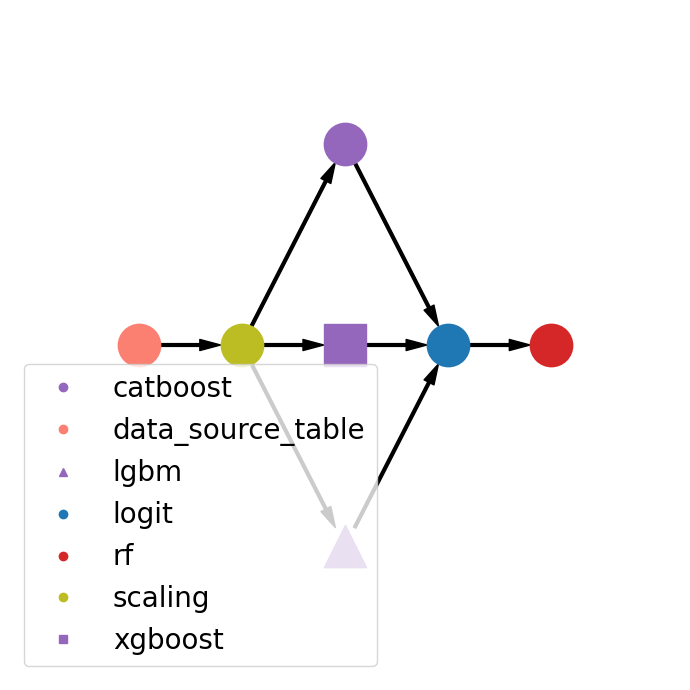

In [60]:
table_model.current_pipeline.show(node_size_scale=0.5, dpi=100)

It is noticeable that the metrics of this model are noticeably worse than those of the multimodal one.

In [61]:
prediction = table_model.predict(table_predict_data)

table_metrics = table_model.get_metrics()

table_metrics

{'roc_auc': 0.5, 'f1': 0.665}

### Metrics

Let's compare the metrics of the AutoML model, the multimodal baseline, and the tabular baseline.

In [62]:
print(f'ROC-AUC of AutoML model is {round(metrics["roc_auc"], 3)}')
print(f'ROC-AUC of baseline model is {round(baseline_metrics["roc_auc"], 3)}')
print(f'ROC-AUC of baseline table model is {round(table_metrics["roc_auc"], 3)}')

ROC-AUC of AutoML model is 0.5
ROC-AUC of baseline model is 0.5
ROC-AUC of baseline table model is 0.5


In [63]:
print(f'F1 of AutoML model is {round(metrics["f1"], 3)}')
print(f'F1 of baseline model is {round(baseline_metrics["f1"], 3)}')
print(f'F1 of baseline table model is {round(table_metrics["f1"], 3)}')

F1 of AutoML model is 0.795
F1 of baseline model is 0.717
F1 of baseline table model is 0.665


## Afterword

In this notebook, we showed you how to run the **FEDOT** framework to solve a classification problem using multimodal data using the API. As you can see, this is done quite simply.

Now you can try running the **FEDOT** automatic machine learning framework on your data.

<i class="fa fa-github" style="font-size:24px"></i> - <a href="https://github.com/nccr-itmo/FEDOT"> Our repository </a>

<i class="fa fa-telegram" style="font-size:24px;color:blue"></i> - <a href="https://t.me/FEDOT_helpdesk">Support chat in Telegram</a>

<i class="fa fa-youtube-play" style="font-size:24px;color:red"></i> - <a href="https://www.youtube.com/channel/UC4K9QWaEUpT_p3R4FeDp5jA">Our Youtube channel</a>